In [1]:

#library



import pandas as pd 
import numpy as np

pd.options.display.max_rows=100




#- Présentation des données :
#- Etude des données manquantes :
#- Repartition des données :
#- Stat bivarié 
#- Matrice de corrélation (variables retenues)

In [2]:
#importation des données 
test_df = pd.read_csv('//ad.univ-lille.fr/Etudiants/Homedir3/27230/Desktop/SEMESTRE 8 -SIAD/house-prices-advanced-regression-techniques/test.csv')
train_df = pd.read_csv('//ad.univ-lille.fr/Etudiants/Homedir3/27230/Desktop/SEMESTRE 8 -SIAD/house-prices-advanced-regression-techniques/train.csv')



In [3]:
# Vue globale sur les données
train_df.columns
test_df.columns
train_df.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Comme nous pouvons le constater, les variables Alley, FireplaceQu, PoolQC, Fence, MiscFeature  ne contiennent pas assez de modalités. Nous avons donc decidé de les supprimer 

In [4]:
# vérifier s'il ya de lignes qui sont dupliquées 
train_df.duplicated().sum()
test_df.duplicated().sum()

0

Nous n'avons aucune ligne dupliquée

Traitement des valeurs manquantes

In [5]:
#valeurs manquantes dans df-train
percent_missing_train = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df_train = pd.DataFrame({'Colonne': train_df.columns,
                                 'Pourcentage': percent_missing_train})


missing_value_df_train.sort_values('Pourcentage', inplace=True)
missing_value_df_train

,Colonne,Pourcentage
Id,Id,0.000000
TotalBsmtSF,TotalBsmtSF,0.000000
Heating,Heating,0.000000
SaleCondition,SaleCondition,0.000000
CentralAir,CentralAir,0.000000
1stFlrSF,1stFlrSF,0.000000
2ndFlrSF,2ndFlrSF,0.000000
LowQualFinSF,LowQualFinSF,0.000000
GrLivArea,GrLivArea,0.000000
BsmtFullBath,BsmtFullBath,0.000000


In [6]:
#valeurs manquantes dans df-test
percent_missing_test = test_df.isnull().sum() * 100 / len(test_df)
missing_value_df_test = pd.DataFrame({'Colonne': test_df.columns,
                                 'Pourcentage': percent_missing_test})


missing_value_df_test.sort_values('Pourcentage', inplace=True)
missing_value_df_test

,Colonne,Pourcentage
Id,Id,0.000000
Foundation,Foundation,0.000000
HeatingQC,HeatingQC,0.000000
CentralAir,CentralAir,0.000000
Electrical,Electrical,0.000000
1stFlrSF,1stFlrSF,0.000000
2ndFlrSF,2ndFlrSF,0.000000
LowQualFinSF,LowQualFinSF,0.000000
GrLivArea,GrLivArea,0.000000
FullBath,FullBath,0.000000


Liste des variables manquantes ayant 
TEST
GarageArea	GarageArea	0.068540
KitchenQual	KitchenQual	0.068540
GarageCars	GarageCars	0.068540
TotalBsmtSF	TotalBsmtSF	0.068540
Exterior1st	Exterior1st	0.068540
Exterior2nd	Exterior2nd	0.068540
BsmtFinSF1	BsmtFinSF1	0.068540
BsmtFinSF2	BsmtFinSF2	0.068540
SaleType	SaleType	0.068540
BsmtUnfSF	BsmtUnfSF	0.068540
BsmtFullBath	BsmtFullBath	0.137080
Functional	Functional	0.137080
Utilities	Utilities	0.137080
BsmtHalfBath	BsmtHalfBath	0.137080
MSZoning	MSZoning	0.274160
MasVnrArea	MasVnrArea	1.028101
MasVnrType	MasVnrType	1.096642

TRAIN
Electrical	Electrical	0.068493
MasVnrArea	MasVnrArea	0.547945
MasVnrType	MasVnrType	0.547945


Comme nous pouvons le constater, les variables Alley, FireplaceQu, PoolQC, Fence, MiscFeature ne contiennent pas assez de modalités. En effet, ces variables ont plus de 50% de données manquantes. Nous avons donc decidé de les supprimé

In [7]:
train_df = train_df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis ='columns')
test_df = test_df.drop(['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis ='columns')

Pour les données manquantes, nous avons fixé un seuil égal à 2% Nous supprimons donc toutes les lignes qui ont moins de 2% de données manquantes. 
Nous ferons donc ces transformations sur les variables : 

GarageArea	GarageArea	0.068540
KitchenQual	KitchenQual	0.068540
GarageCars	GarageCars	0.068540
TotalBsmtSF	TotalBsmtSF	0.068540
Exterior1st	Exterior1st	0.068540
Exterior2nd	Exterior2nd	0.068540
BsmtFinSF1	BsmtFinSF1	0.068540
BsmtFinSF2	BsmtFinSF2	0.068540
SaleType	SaleType	0.068540
BsmtUnfSF	BsmtUnfSF	0.068540
BsmtFullBath	BsmtFullBath	0.137080
Functional	Functional	0.137080
Utilities	Utilities	0.137080
BsmtHalfBath	BsmtHalfBath	0.137080
MSZoning	MSZoning	0.274160
MasVnrArea	MasVnrArea	1.028101
MasVnrType	MasVnrType	1.096642
Electrical	Electrical	0.068493
MasVnrArea	MasVnrArea	0.547945
MasVnrType	MasVnrType	0.547945

In [8]:
test_df.shape
train_df.shape

(1460, 76)

In [9]:

# suppression des lignes avec des données manquantes dans df_train
train_df=train_df.dropna(subset=['GarageCars', 'GarageArea','KitchenQual','Exterior1st','SaleType','TotalBsmtSF','BsmtUnfSF','Exterior2nd',
                       'SaleType','TotalBsmtSF','BsmtUnfSF','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','Functional',
                       'Utilities','BsmtHalfBath','Electrical','MasVnrType', 'Electrical','MasVnrArea','MSZoning'])

Maintenant, nous allons traiter les variables ayant des données manquantes comprises entre 2% et 5%. Il s'agit de : 

test
BsmtFinType2	BsmtFinType2	2.878684
BsmtFinType1	BsmtFinType1	2.878684
BsmtExposure	BsmtExposure	3.015764
BsmtQual	BsmtQual	3.015764
BsmtCond	BsmtCond	3.084304
GarageType	GarageType	5.209047
GarageFinish	GarageFinish	5.346127
GarageYrBlt	GarageYrBlt	5.346127
GarageQual	GarageQual	5.346127
GarageCond	GarageCond	5.346127
LotFrontage	LotFrontage	15.558602

train
BsmtQual	BsmtQual	2.534247
BsmtCond	BsmtCond	2.534247
BsmtFinType1	BsmtFinType1	2.534247
BsmtFinType2	BsmtFinType2	2.602740
BsmtExposure	BsmtExposure	2.602740
GarageYrBlt	GarageYrBlt	5.547945
GarageQual	GarageQual	5.547945
GarageCond	GarageCond	5.547945
GarageType	GarageType	5.547945
GarageFinish	GarageFinish	5.547945
LotFrontage	LotFrontage	17.739726

In [10]:
# on remplace les données manquantes des variables numériques par la moyenne

train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean(),inplace = True)
train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(),inplace = True)

test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean(),inplace = True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(),inplace = True)

In [11]:
#train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode())

train_df['BsmtQual'].value_counts()
train_df['BsmtQual'].fillna('TA',inplace = True)

train_df['BsmtCond'].value_counts()
train_df['BsmtCond'].fillna('TA',inplace = True)

train_df['BsmtFinType1'].value_counts()
train_df['BsmtFinType1'].fillna('Unf',inplace = True)

train_df['BsmtFinType2'].value_counts()
train_df['BsmtFinType2'].fillna('Unf',inplace = True)

train_df['BsmtExposure'].value_counts()
train_df['BsmtExposure'].fillna('No',inplace = True)

train_df['GarageQual'].value_counts()
train_df['GarageQual'].fillna('TA',inplace = True)


train_df['GarageCond'].value_counts()
train_df['GarageCond'].fillna('TA',inplace = True)


train_df['GarageType'].value_counts()
train_df['GarageType'].fillna('Attchd',inplace = True)


train_df['GarageFinish'].value_counts()
train_df['GarageFinish'].fillna('Unf',inplace = True)
#####
test_df['BsmtQual'].value_counts()
test_df['BsmtQual'].fillna('TA',inplace = True)

test_df['BsmtCond'].value_counts()
test_df['BsmtCond'].fillna('TA',inplace = True)

test_df['BsmtFinType1'].value_counts()
test_df['BsmtFinType1'].fillna('Unf',inplace = True)

test_df['BsmtFinType2'].value_counts()
test_df['BsmtFinType2'].fillna('Unf',inplace = True)

test_df['BsmtExposure'].value_counts()
test_df['BsmtExposure'].fillna('No',inplace = True)

test_df['GarageQual'].value_counts()
test_df['GarageQual'].fillna('TA',inplace = True)


test_df['GarageCond'].value_counts()
test_df['GarageCond'].fillna('TA',inplace = True)


test_df['GarageType'].value_counts()
test_df['GarageType'].fillna('Attchd',inplace = True)


test_df['GarageFinish'].value_counts()
test_df['GarageFinish'].fillna('Unf',inplace = True)

In [12]:
#Verification si les valeurs manquantes sont traitées
#valeurs manquantes dans df-train
percent_missing_train2 = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df_train2 = pd.DataFrame({'Colonne': train_df.columns,
                                 'Pourcentage': percent_missing_train2})


missing_value_df_train2.sort_values('Pourcentage', inplace=True)
missing_value_df_train2

,Colonne,Pourcentage
Id,Id,0.0
Functional,Functional,0.0
TotRmsAbvGrd,TotRmsAbvGrd,0.0
KitchenQual,KitchenQual,0.0
KitchenAbvGr,KitchenAbvGr,0.0
BedroomAbvGr,BedroomAbvGr,0.0
HalfBath,HalfBath,0.0
FullBath,FullBath,0.0
BsmtHalfBath,BsmtHalfBath,0.0
BsmtFullBath,BsmtFullBath,0.0


In [13]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

Comme on peut le voir notre base de données ne contient aucune données manquantes. 
Nous pouvons maintenant passer à l'exploration analytique de notre dataset.

# Statistiques descriptives 

In [14]:
print("structure de la base d'apprentissage : ",train_df.shape)
print("structure de la base de test: ",test_df.shape)

structure de la base d'apprentissage :  (1451, 76)
structure de la base de test:  (1459, 75)


Notre base d'apprentissage est constituée de 1460 modalités pour 76 variables. 

Regardons de plus près les propriétés statistiques de notre Dataset.

Tout d'abord, nous nous intéresserons à la distribution statistique de nos données numériques.  

In [15]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,70.027638,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,...,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,22.040935,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,...,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,70.027638,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
# library pour la visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt

Nous allons regarder la fréquence de nos variables catégorielles afin de faire un premier tri sur nos variables.

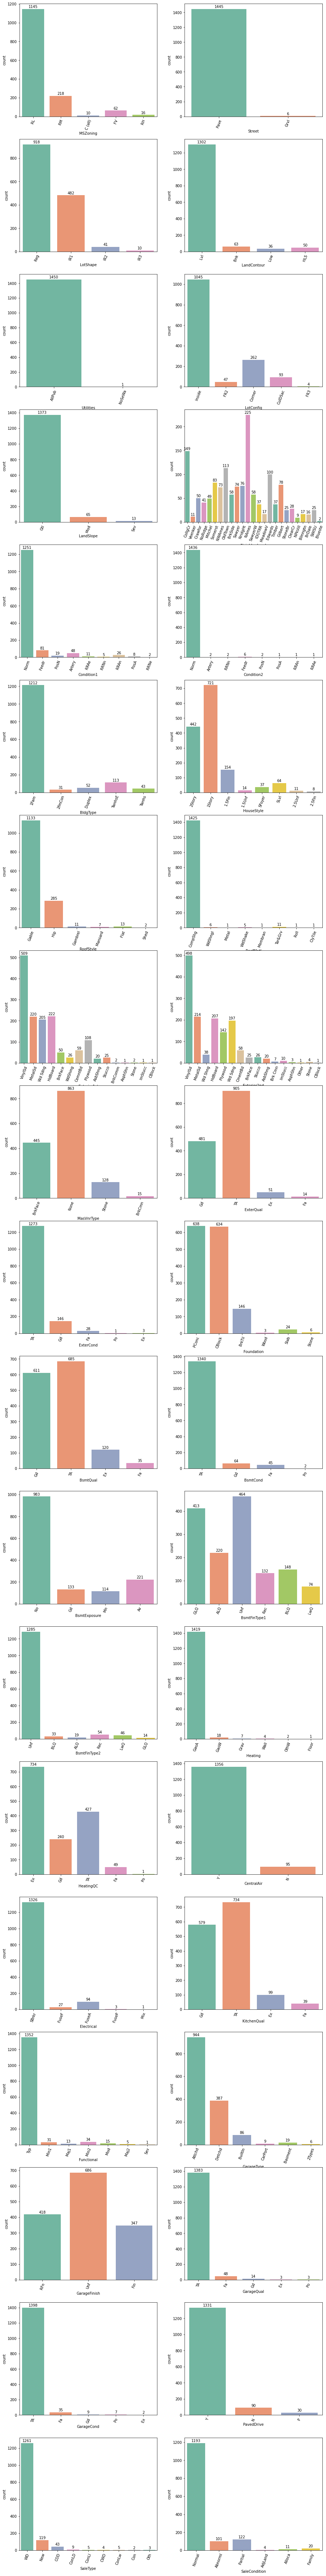

In [17]:
#créer une liste des variables catégorielles
categorielle = list(train_df.select_dtypes(include = [object]).columns)


#visualisation 

plt.figure(figsize=(15,150))
plotnumber=1
for c in categorielle:
    ax=plt.subplot(22,2,plotnumber)
    b= sns.countplot(x=train_df[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show()


Les variables ci-dessous ont des modalités avec de fréquences très hétérogènes. En effet, plus de 90% des données sont concentrées
dans une seule modalité. Cela fournit donc très peu d'informations dans l'ensemble de données. 
Ce sont : 

- La variable "Street", le type d'accès routier 
- "utilities", type d'utilitaires disponibles
- "condition 2"
- RoofMatl Matériau de toiture
- heating

In [18]:
#suppression des variables
train_df = train_df.drop(['Street','Utilities','Condition2','RoofMatl','Heating'], axis ='columns')
test_df = test_df.drop(['Street','Utilities','Condition2','RoofMatl','Heating'], axis ='columns')

Etude de la relation entre les variables catégorielles et la variable cible.

In [19]:
#CALCUL DU V DE CRAMER SUR LES VARIABLES CATEGORIELLES
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

#suppression des variables

# Liste des variables catégorielles
cat_vars = ['MSZoning', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

# Boucle pour calculer la statistique de Cramer V pour chaque variable catégorielle
for var in cat_vars:
    crosstab = pd.crosstab(train_df['SalePrice'], train_df[var])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    V = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
    print(f"La statistique de Cramer V entre la variable cible et {var} est {V:.4f}")
  #  print(f"La statistique de chi2 entre la variable cible et {var} est {chi2:.4f}")
    

La statistique de Cramer V entre la variable cible et MSZoning est 0.7326
La statistique de Cramer V entre la variable cible et LotShape est 0.7472
La statistique de Cramer V entre la variable cible et LandContour est 0.6878
La statistique de Cramer V entre la variable cible et LotConfig est 0.6892
La statistique de Cramer V entre la variable cible et LandSlope est 0.6896
La statistique de Cramer V entre la variable cible et Neighborhood est 0.6939
La statistique de Cramer V entre la variable cible et Condition1 est 0.5968
La statistique de Cramer V entre la variable cible et BldgType est 0.6349
La statistique de Cramer V entre la variable cible et HouseStyle est 0.6705
La statistique de Cramer V entre la variable cible et RoofStyle est 0.6039
La statistique de Cramer V entre la variable cible et Exterior1st est 0.6521
La statistique de Cramer V entre la variable cible et Exterior2nd est 0.6608
La statistique de Cramer V entre la variable cible et MasVnrType est 0.7237
La statistique d

Le V de Cramer nous permet de mesurer l'intensité entre notre variable cible et les variables catégorielles retenues.
Nous notons que les variables dont les intensités sont les plus fortes (>0,75) sont :
GarageFinish - CentralAir - BsmtQual - ExterQual - KitchenQual 

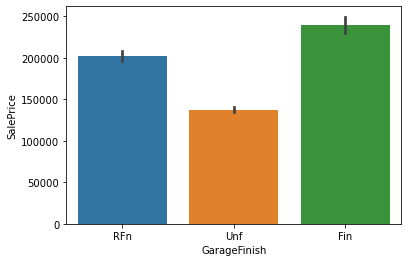

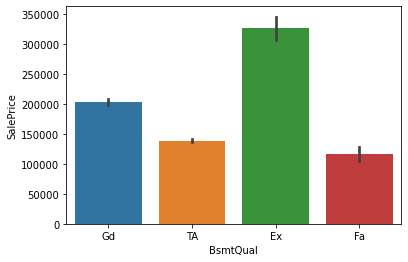

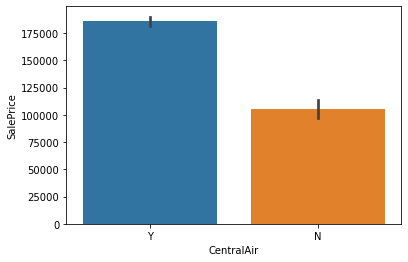

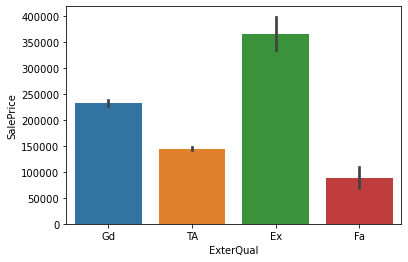

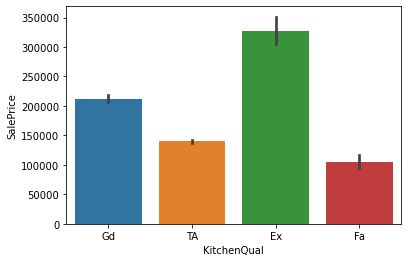

In [20]:
# Créer un graphique en barres pour la colonne de données catégorielles


sns.barplot(x='GarageFinish', y='SalePrice', data=train_df)
plt.show()
sns.barplot(x='BsmtQual', y='SalePrice', data=train_df)
plt.show()
sns.barplot(x='CentralAir', y='SalePrice', data=train_df)
plt.show()
sns.barplot(x='ExterQual', y='SalePrice', data=train_df)
plt.show()
sns.barplot(x='KitchenQual', y='SalePrice', data=train_df)
plt.show()

Nous remarquons que sur ces variables la répartition des données sur les modalités est assez équilibrée.

Graphique des répartitions des variables numérique

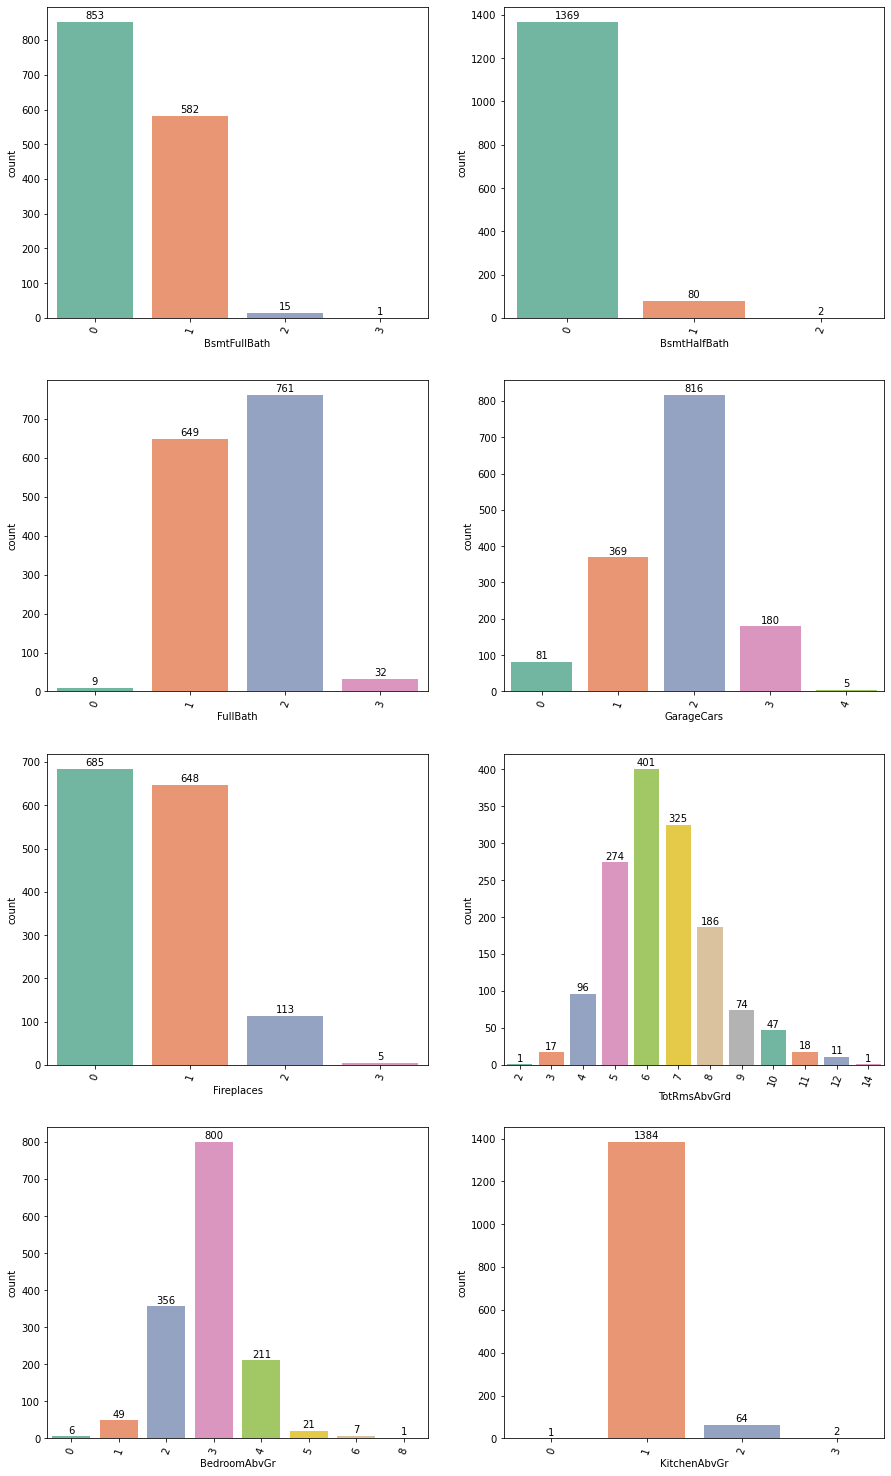

In [21]:
#Dans un premier temps, on regarde la repartion sur les variables numériques dont les modalités peuvent regroupées et classées.
repartition1 = train_df[["BsmtFullBath","BsmtHalfBath","FullBath","GarageCars","Fireplaces","TotRmsAbvGrd","BedroomAbvGr","KitchenAbvGr"]]


plt.figure(figsize=(15,150))
plotnumber=1
for c in repartition1:
    ax=plt.subplot(22,2,plotnumber)
    b= sns.countplot(x=repartition1[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show()

In [22]:
plt.figure(figsize=(15,150))
plotnumber=1
for c in df2:
    ax=plt.subplot(22,2,plotnumber)
    b= sns.countplot(x=df2[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show()

NameError: name 'df2' is not defined

<Figure size 1080x10800 with 0 Axes>

Afin d'observer les répartitions des variables continues, nous avons créer des classes pour que celle ci soit correctement lisible. 
Nous avons fait le meme constat que la première vague de répartition, certaines tranches doivent aussi etre regrouper. Comme nous pouvons le voir avec le prix de vente ou peu de maison sont vendu à plus de 300 000 par exemple.

In [ ]:
df_all_corr = train_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'SalePrice']
df_all_corr["Type_var"]=df_all_corr.apply(lambda row : train_df[row["Feature 2"]].dtypes,axis=1)
df_all_corr[df_all_corr['Feature 1'] == 'SalePrice']

Les variables ci-dessous ont une forte correlation avec le prix du logement. Il s'agit de: 
- OverallQual, la qualité globale des matériaux finis 
- GrLivArea, surface habitable  
- YearBuilt, l'age de la construction de logement 
- GarageCars
- GarageArea
- TotalBsmtSF

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('Set1')
sns.set_context('notebook')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12))


dict_1 = {'YearBuilt':ax2,
                    'GrLivArea':ax3}

dict_2 = {'MSZoning':ax1,
                'ExterQual':ax4}

for col, ax in dict_1.items():
    sns.scatterplot(x=col, y='SalePrice', hue='BldgType', marker='.', data=train_df[train_df[col] != 0], ax=ax)
    
for col, ax in dict_2.items():
    sns.histplot(x='SalePrice', data=train_df, hue=col, ax=ax, element='step', kde=True)
    
ax1.set_xlabel('Prix de logement')
ax2.set_xlabel('Année de construction')
ax3.set_xlabel('Surface habitable')
ax4.set_xlabel('Prix de logement')


plt.show()

In [ ]:
Comme le montre le graphique, le prix de logement est corrélé avec la surface habitable. Plus grande est la surface, plus le logement devient cher. Et ceci, pour chaque type de logement.

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12))

dict_1 = {'GarageCars':ax1,
                    'GarageArea':ax4}

dict_2 = {'ExterQual':ax2,
                'KitchenQual':ax3}

for col, ax in dict_1.items():
    sns.scatterplot(x=col, y='SalePrice', hue='BldgType', marker='.', data=train_df[train_df[col] != 0], ax=ax)

for col, ax in dict_2.items():
    sns.histplot(x='SalePrice', data=train_df, hue=col, ax=ax, element='step', kde=True)

plt.show()

In [ ]:
# Calculez la matrice de corrélation
corr_matrix = train_df.corr()

# Affichez les corrélations supérieures à 0,5
print(corr_matrix[corr_matrix > 0.5])

In [ ]:
import seaborn as sb
plt.figure(figsize=(30, 20))
dataplot = sb.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
Les variables numériques qui sont le plus corellés (supérieur à 0,5) aves le prix du logement sont : 
-GrLivAra (mètre carrés de surface habitable au-dessus du niveau du sol (au sol))
-overallqual (note évaluant le matériau global et la finition de la maison)
-TotalBsmtSF (surface du sous-sol en mètres carrés)
-1stFlrSF (surface du 1er étage en mètres carrés)
-GarageCars (nombre de voitures supportés par le garage)
-GarageArea (surface su garage)
-YearBuilt (Année de construction)
-YearRemodAdd (Année de rénovation)
-Fullbath (Salles de bain complètes au-dessus du sol)
-TotRmsAbvGrd (Nombre total de chambres au-dessus du sol)

On remarque également des corrélations en certaines variables :
garageyrblt + yearbuilt
garageCars + yearbuilt
overallquall + yearbuilt
yearRemodadd + yearbuilt
garageyrblt + YearRemodAdd  
GarageCars + OverallQual
BsmtFullBath + BsmtFinSF1
Bsmtfullbath + totalVsmtSF 

-Sur la surface du sous-sol on note une corrélation entre la surface totale du sous-sol(totalVsmtSF), la surface des salles de bains(Bsmtfullbath) et les surfaces du T1(BsmtFinSF1).
On décide donc de conserver uniquement la surface totale du sous-sol que nous trouvons plus interessant.

-La variable de l'année de construcion du garage(garageyrblt) sera également supprimée car est très corrélée à la date de construction de la maison (yearbuilt). On trouve cette dernière plus interessante.

-Nous supprimerons également la variable garageArea à la place de garageCars car on note que cette dernière influence plus sur le prix du logement (0,62 et 0,64).


-Nous décidons de conserver la date de rénovation (YearRemodAdd) qui est égale à la date de construction (yearbuilt) s'il n'y a pas de rénovation. Ainsi on note que la rénovation a un impact sur le prix du logement.